In [2]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import cv2
from glob import glob
import os
from datetime import datetime
from skimage.restoration import denoise_nl_means, denoise_wavelet
from skimage.exposure import equalize_hist, equalize_adapthist
from skimage import exposure, filters
from scipy import ndimage

In [6]:
input_dir = "Raw_Image_folders\AR11158_2011_02_13_1728_aia.euv_12m_94"

In [7]:
img_l = [fits.getdata(f) for f in glob(input_dir + "/*.fits")]

In [8]:
len(img_l)

153

In [10]:
img_l[0]

array([[ 3.,  7.,  2., ...,  0.,  1.,  0.],
       [ 3.,  0.,  4., ...,  1.,  3.,  2.],
       [ 3.,  7.,  4., ...,  4.,  2.,  1.],
       ...,
       [ 2.,  1.,  3., ...,  3.,  2.,  1.],
       [ 0.,  1.,  2., ...,  5.,  5., -1.],
       [ 0.,  1.,  3., ...,  6.,  2.,  2.]], dtype=float32)

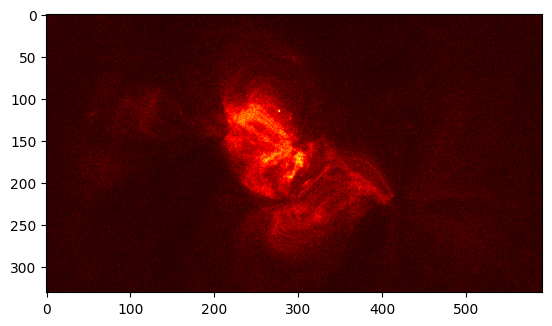

In [6]:
from astropy.visualization import astropy_mpl_style
#plt.style.use(astropy_mpl_style)
plt.imshow(img_list[1], cmap='hot')

In [31]:
from scipy.ndimage import gaussian_filter, laplace
from skimage.transform import rescale

def enhance_image(img):
    
    '''# Apply a Gaussian filter for smoothing
    smoothed_data = gaussian_filter(image, sigma=1)    

    scaled_data = np.interp(smoothed_data, (smoothed_data.min(), smoothed_data.max()), (0, 255))

    # Upscale the image using interpolation
    #upscale_factor = 10 # Adjust as needed
    #upscaled_data = rescale(scaled_data, scale=upscale_factor)'''

    kernel = np.ones((1,1),np.uint8)
    opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
    sure_bg = cv.dilate(opening,kernel,iterations=3)
    closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)



    return opening
    

# Enhance the image
enhanced_list = [enhance_image(i) for i in img_list]

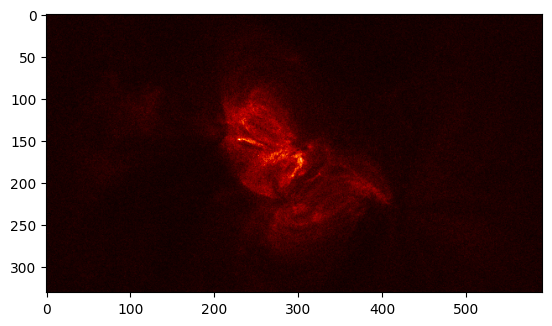

In [32]:
from matplotlib.colors import LogNorm

plt.imshow(enhanced_list[0], cmap = 'gist_heat')

NameError: name 'enhanced_list' is not defined

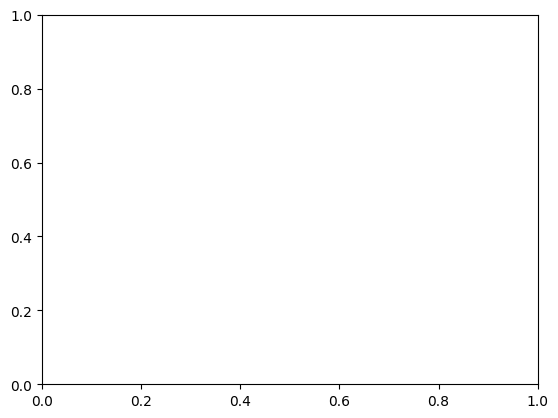

In [11]:
from matplotlib.animation import FuncAnimation
%matplotlib inline 

fig, ax = plt.subplots()

# Function to update the plot for each frame
def update(frame):
    plt.cla()
    plt.imshow(enhanced_list[frame], cmap='hot')
    plt.title(f'Frame {frame + 1}')

animation = FuncAnimation(fig, update, frames=len(enhanced_list), interval=100)

animation.save('output_video.avi', writer='ffmpeg', fps=30, bitrate=1080)
